In [21]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt


# LBP


size=256


def LBP(img): 
    
    def thresholded(center, pixels):
        out = []
        for a in pixels:
            if a >= center:
                out.append(1)
            else:
                out.append(0)
        return out

    
    def get_pixel_else_0(img,x,y):
        size=len(img)
        default=0
        if x<0 or y<0 or x>size-1 or y>size-1 :
            return default
        else:
            return img[x][y]




    image=cv2.resize(img,(size,size))
    temp=np.zeros((size,size),dtype=np.uint8)
    for x in range(0, len(image)):
        for y in range(0, len(image[0])):
 
            center = image[x,y]

            top_left      = get_pixel_else_0(image, x-1, y-1)

            top_up        = get_pixel_else_0(image, x-1, y)

            top_right     = get_pixel_else_0(image, x-1, y+1)

            right         = get_pixel_else_0(image, x, y+1 )

            left          = get_pixel_else_0(image, x, y-1 )

            bottom_left   = get_pixel_else_0(image, x+1, y-1)

            bottom_right  = get_pixel_else_0(image, x+1, y+1)

            bottom_down   = get_pixel_else_0(image, x+1,   y )

            values=[]
            values = thresholded(center, [top_left, top_up, top_right, right, bottom_right,
                                  bottom_down, bottom_left, left])

            weights = [1, 2 , 4, 8 , 16 , 32, 64, 128]
            res = 0
            for a in range(0, len(values)):
                res += weights[a] * values[a]

            temp[x][y]=res

    #_ = plt.hist(temp, bins=64)  
    #plt.show()
    hist, bin_edges = np.histogram(temp,bins=64)
    
    return hist

img=cv2.imread('./data/Cristiano Ronaldo/cri.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY )
img_lbp=LBP(gray)


In [22]:
from skimage.feature import local_binary_pattern

In [24]:
def LBP(path):
    P = 8
    R = 1
    img=cv2.imread(path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    lbp_img = local_binary_pattern(gray, P=P, R=R, method="default")
    return lbp_img

# construire le matrices X constitué par les vecteurs caractéristiques des image de corpus

In [25]:

from imutils import paths 
X, y = [], []
for training_image in paths.list_images('C:\\Users\\Samir\\Desktop\\Samir_VA_Project\\croppedMostTrue'):
       #just stop here to see all file names printed
        path=training_image
        lbp=LBP(path)
        
        img = cv2.imread(training_image)
        if img is None:
            continue
            
        scalled_raw_img=cv2.resize(img,(64,64))
        scalled_img_lbp=cv2.resize(lbp,(64,64))
        combined=np.vstack((scalled_raw_img.reshape(64*64*3,1),scalled_img_lbp.reshape(64*64,1)))
        
        X.append(combined)
        y.append(training_image.split("\\")[-2])  

In [26]:
len(X),len(X[0])

(2131, 16384)

In [27]:
X = np.array(X).reshape(len(X),16384)
X.shape

(2131, 16384)

#  optimiser entrainer et enregistrer le modèle

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [30]:

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(C=1, gamma='auto', kernel='linear', probability=True))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.724202626641651

In [31]:
print(classification_report(y_test, pipe.predict(X_test) ))

                      precision    recall  f1-score   support

Alessandro Del Piero       0.57      0.61      0.59        28
     Andreas Iniesta       0.73      0.85      0.79        13
   Andriy Shevchenko       0.63      0.78      0.70        46
   Cristiano Ronaldo       0.65      0.87      0.75        47
       Didier Drogba       0.69      0.39      0.50        23
      Diego Maradona       0.73      0.85      0.79        13
      Edinson Cavani       0.71      0.55      0.62        22
     Francesco Totti       0.86      0.86      0.86        14
     Gianlugi Buffon       0.67      0.60      0.63        10
       Iker Casillas       0.78      0.81      0.79        31
        Lionel Messi       0.92      0.73      0.81        45
         Luka Modric       0.64      0.70      0.67        43
       Mohamed Salah       0.97      0.94      0.95        31
        Pavel Nedved       0.33      0.33      0.33         6
                Pele       1.00      0.83      0.91        12
       

In [18]:
from sklearn import svm


In [19]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    }
    
}

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

In [ ]:
best_estimators

In [ ]:
best_estimators['svm'].score(X_test,y_test)

# chercher les meilleures paramètres du modèle

In [ ]:

model=SVC(C=1, gamma='auto', kernel='linear', probability=True)
model.fit(X_train, y_train)
model.score(X_test, y_test)

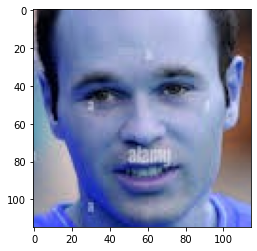

In [46]:
test=cv2.imread('./croppedMostTrue/Andreas Iniesta/Andreas Iniesta3.png')
plt.imshow(test)

In [48]:
img = cv2.imread('./croppedMostTrue/Andreas Iniesta/Andreas Iniesta3.png')
if img is not None:
    scalled_raw_img=cv2.resize(img,(64,64))
    lbp=LBP(img)
    scalled_img_lbp=cv2.resize(lbp,(64,64))
    combined=np.vstack((scalled_raw_img.reshape(64*64*3,1),scalled_img_lbp.reshape(64*64,1)))
    X = np.array(combined).reshape(1,16384).astype(float)
    
model.predict(X)


array(['Andreas Iniesta'], dtype='<U20')

In [49]:
import pickle
import os
def save_model(model, filename, path=""): 
    with open(os.path.join(path, filename), 'wb') as out_name:
        pickle.dump(model, out_name, pickle.HIGHEST_PROTOCOL)

def read_model(filename, path=""):
    with open(os.path.join(path, filename), 'rb') as in_name:
        model = pickle.load(in_name)
        return model

In [50]:
save_model(model, "Lbp_svm.pkl", path="")

In [51]:
lbph_svm_model_v2 = read_model("Lbp_svm.pkl", path="")